## PCA-analysis 

In [31]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

In [3]:
#upload the dataset 
df = pd.read_csv('heart_failure_clinical_records_dataset.csv', sep = ',')
#display variables
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
#returns the number of rows and columns in the dataset
df.shape

(299, 13)

In [5]:
#column names
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
#to display the format for floating-point numbers in DataFrames to two decimal places using a lambda function.
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# after the amndmends. 
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.00,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.00,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.00,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.00,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.00,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.00,0,61,1,38,1,155000.00,1.10,143,1,1,270,0
295,55.00,0,1820,0,38,0,270000.00,1.20,139,0,0,271,0
296,45.00,0,2060,1,60,0,742000.00,0.80,138,0,0,278,0
297,45.00,0,2413,0,38,0,140000.00,1.40,140,1,1,280,0


In [8]:
# basic stats of the data
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,60.83,0.43,581.84,0.42,38.08,0.35,263358.03,1.39,136.63,0.65,0.32,130.26,0.32
std,11.89,0.50,970.29,0.49,11.83,0.48,97804.24,1.03,4.41,0.48,0.47,77.61,0.47
min,40.00,0.00,23.00,0.00,14.00,0.00,25100.00,0.50,113.00,0.00,0.00,4.00,0.00
25%,51.00,0.00,116.50,0.00,30.00,0.00,212500.00,0.90,134.00,0.00,0.00,73.00,0.00
50%,60.00,0.00,250.00,0.00,38.00,0.00,262000.00,1.10,137.00,1.00,0.00,115.00,0.00
75%,70.00,1.00,582.00,1.00,45.00,1.00,303500.00,1.40,140.00,1.00,1.00,203.00,1.00
max,95.00,1.00,7861.00,1.00,80.00,1.00,850000.00,9.40,148.00,1.00,1.00,285.00,1.00


In [9]:
# Scaling for normalizing the data for PCA.
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)
df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.19,-0.87,0.00,-0.85,-1.53,1.36,0.02,0.49,-1.50,0.74,-0.69,-1.63,1.45
1,-0.49,-0.87,7.51,-0.85,-0.01,-0.74,0.00,-0.28,-0.14,0.74,-0.69,-1.60,1.45
2,0.35,-0.87,-0.45,-0.85,-1.53,-0.74,-1.04,-0.09,-1.73,0.74,1.45,-1.59,1.45
3,-0.91,1.15,-0.49,-0.85,-1.53,-0.74,-0.55,0.49,0.09,0.74,-0.69,-1.59,1.45
4,0.35,1.15,-0.44,1.18,-1.53,-0.74,0.65,1.26,-4.68,-1.36,-0.69,-1.58,1.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.10,-0.87,-0.54,1.18,-0.01,1.36,-1.11,-0.28,1.45,0.74,1.45,1.80,-0.69
295,-0.49,-0.87,1.28,-0.85,-0.01,-0.74,0.07,-0.19,0.54,-1.36,-0.69,1.82,-0.69
296,-1.33,-0.87,1.53,1.18,1.85,-0.74,4.90,-0.58,0.31,-1.36,-0.69,1.91,-0.69
297,-1.33,-0.87,1.89,-0.85,-0.01,-0.74,-1.26,0.01,0.77,0.74,1.45,1.93,-0.69


In [11]:
# renaming the variables.
df_scaled = df_scaled.rename(index=str, columns={0:'age', 1:'anaemia', 2:'creatinine_phosphokinase', 3:'diabetes',
       4:'ejection_fraction', 5:'high_blood_pressure', 6:'platelets',
       7:'serum_creatinine', 8:'serum_sodium', 9:'sex', 10:'smoking', 11:'time',
       12:'DEATH_EVENT'})
df_scaled

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.19,-0.87,0.00,-0.85,-1.53,1.36,0.02,0.49,-1.50,0.74,-0.69,-1.63,1.45
1,-0.49,-0.87,7.51,-0.85,-0.01,-0.74,0.00,-0.28,-0.14,0.74,-0.69,-1.60,1.45
2,0.35,-0.87,-0.45,-0.85,-1.53,-0.74,-1.04,-0.09,-1.73,0.74,1.45,-1.59,1.45
3,-0.91,1.15,-0.49,-0.85,-1.53,-0.74,-0.55,0.49,0.09,0.74,-0.69,-1.59,1.45
4,0.35,1.15,-0.44,1.18,-1.53,-0.74,0.65,1.26,-4.68,-1.36,-0.69,-1.58,1.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.10,-0.87,-0.54,1.18,-0.01,1.36,-1.11,-0.28,1.45,0.74,1.45,1.80,-0.69
295,-0.49,-0.87,1.28,-0.85,-0.01,-0.74,0.07,-0.19,0.54,-1.36,-0.69,1.82,-0.69
296,-1.33,-0.87,1.53,1.18,1.85,-0.74,4.90,-0.58,0.31,-1.36,-0.69,1.91,-0.69
297,-1.33,-0.87,1.89,-0.85,-0.01,-0.74,-1.26,0.01,0.77,0.74,1.45,1.93,-0.69


In [43]:
# an expriment which didn't worked out here.
features = df_scaled.drop('DEATH_EVENT', axis=1)  # Assuming 'target_column' is your target variable
target = df_scaled['DEATH_EVENT']


In [53]:
pca_1 = PCA(n_components=2)
scaler = StandardScaler()
pca_1 = features.fit_transform(df_scaled)
pca_1

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
        -6.87681906e-01, -1.62950241e+00,  1.45416070e+00],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00, ...,
        -6.87681906e-01, -1.60369074e+00,  1.45416070e+00],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01, ...,
         1.45416070e+00, -1.59078490e+00,  1.45416070e+00],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.52597865e+00, ...,
        -6.87681906e-01,  1.90669738e+00, -6.87681906e-01],
       [-1.33339153e+00, -8.71104775e-01,  1.89039811e+00, ...,
         1.45416070e+00,  1.93250906e+00, -6.87681906e-01],
       [-9.12335403e-01, -8.71104775e-01, -3.98321274e-01, ...,
         1.45416070e+00,  1.99703825e+00, -6.87681906e-01]])

In [54]:
pca1 = pca_1[:, 0]
pca2 = pca_1[:, 1]


Text(0.5, 1.0, 'PCA: Heart_failure_clinical_records')

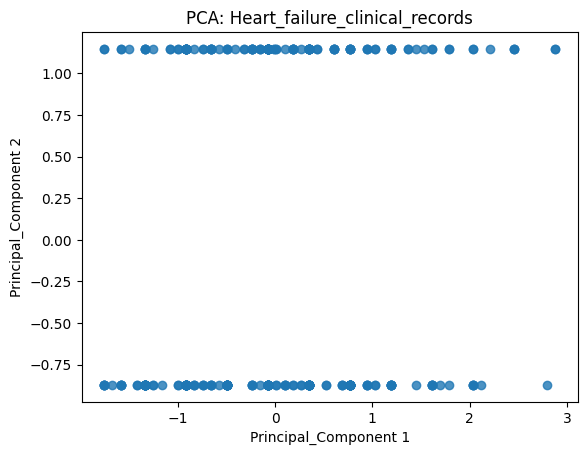

In [68]:
# a failed plot
plt.scatter(pca1, pca2, alpha=0.8)
plt.xlabel('Principal_Component 1')
plt.ylabel('Principal_Component 2')
plt.title('PCA: Heart_failure_clinical_records')

In [57]:
#fitting the data to plot
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(df_scaled)
X_pca_2

array([[ 3.11211975e+00,  4.35577233e-01],
       [ 1.00800314e+00,  1.98754397e+00],
       [ 2.52949760e+00,  2.21890654e+00],
       [ 2.00008139e+00,  3.42221979e-01],
       [ 3.51314690e+00, -1.46527444e+00],
       [ 3.56724404e+00,  5.82724818e-01],
       [ 2.65163312e+00,  5.58731089e-01],
       [ 1.29166868e+00, -8.08745342e-02],
       [ 9.37534885e-01, -1.41057879e+00],
       [ 5.57988668e+00,  2.19092583e-01],
       [ 3.67367272e+00,  3.78278726e-01],
       [ 1.76058319e+00,  1.42217602e+00],
       [ 1.43068049e+00,  4.58993897e-01],
       [ 1.62395393e+00, -5.63379042e-01],
       [ 9.94258533e-02, -1.87853892e+00],
       [ 2.40361505e+00, -1.84805123e-02],
       [ 2.15154294e+00, -1.78679669e-01],
       [ 1.86578882e+00,  1.33432072e+00],
       [ 2.09692410e+00, -1.60134934e+00],
       [ 2.03994392e+00, -1.72410621e+00],
       [ 9.61616591e-01, -1.59029825e+00],
       [ 2.05669281e+00, -2.28136998e+00],
       [ 1.94857675e+00,  6.09315509e-01],
       [-7.

In [58]:
pca_2.explained_variance_ratio_

array([0.15622596, 0.12776378])

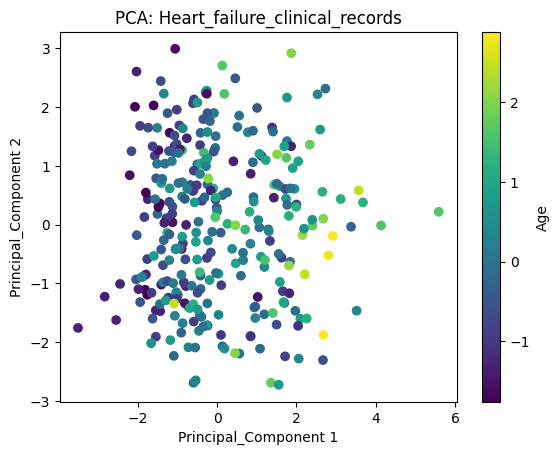

In [77]:
#scatter_plot                 
plt.scatter(X_pca_2[:,0], X_pca_2[:,1], c= df_scaled.age) 
plt.xlabel('Principal_Component 1')
plt.ylabel('Principal_Component 2')
plt.title('PCA: Heart_failure_clinical_records')
plt.colorbar(label='Age')  # Adding a colorbar to show age scale

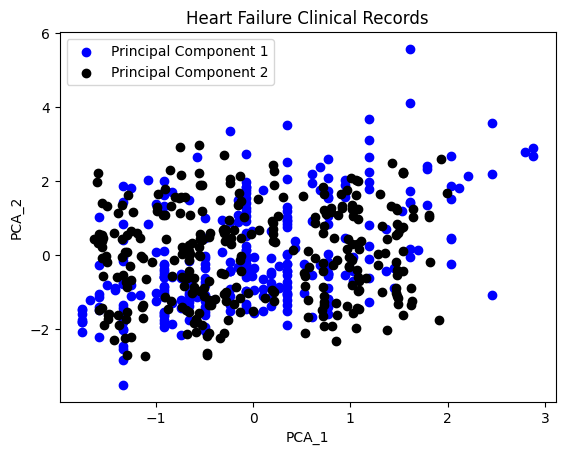

In [88]:
plt.scatter(df_scaled.age, X_pca_2[:,0], c='blue', label='Principal Component 1')
plt.scatter(df_scaled.time, X_pca_2[:,1], c='black', label='Principal Component 2')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title('Heart Failure Clinical Records')
plt.legend()
plt.show()


In [69]:
#PCA on two compnents.
pca_4 = PCA(n_components=4)
X_pca_4 = pca_4.fit_transform(df_scaled)
X_pca_4

array([[ 3.11211975,  0.43557723, -0.56825801,  0.66588915],
       [ 1.00800314,  1.98754397, -2.52749643,  4.46875162],
       [ 2.5294976 ,  2.21890654, -0.78642159, -0.60219483],
       ...,
       [-3.50183761, -1.75889898, -1.53559353,  2.98070301],
       [-2.02708583,  2.60689646, -0.38222895,  0.07149167],
       [-1.93779849,  1.68167035,  0.14730457, -0.10818014]])

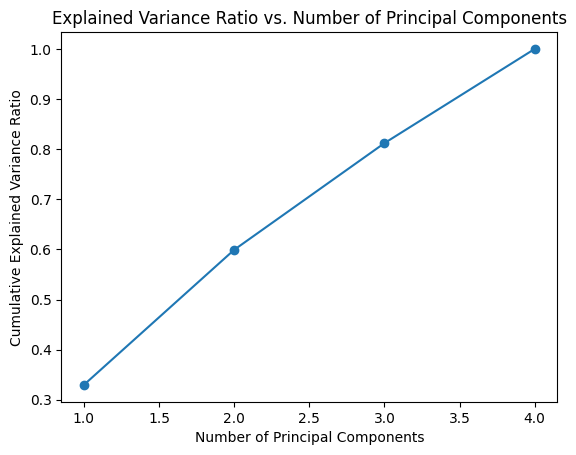

In [76]:
# Can't plot 3D model for all four compnents,so here is the varience plot. 
pca = PCA()
pca_4 = pca.fit_transform(X_pca_4)

# Plot Explained Variance Ratio
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()